In [31]:
import pandas as pd
db = pd.read_csv('lymphography.csv', names=["target","lymphatics","block of affere","bl. of lymph. c","bl. of lymph. s","by pass","extravasates","regeneration of","early uptake in","lym.nodes dimin","lym.nodes enlar","changes in lym.","defect in node","changes in node","changes in stru","special forms","dislocation of","exclusion of no","no. of nodes in"]).dropna()
descriptive = db.iloc[:,1:19].values
target = db.iloc[:,0].values

In [32]:
#Data visualization
#db.describe()
db.head()
#print("done!")

,target,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [33]:
print("Descriptive:")
print(descriptive)
print("Target")
print(target)

Descriptive:
[[4 2 1 ... 1 2 2]
 [3 2 1 ... 2 2 2]
 [3 2 2 ... 2 2 7]
 ...
 [2 2 1 ... 2 2 4]
 [2 1 1 ... 2 2 1]
 [2 2 2 ... 2 2 6]]
Target
[3 2 3 3 2 2 2 2 3 3 2 2 2 3 4 2 2 2 2 2 3 3 2 2 3 3 3 3 2 3 3 3 2 2 2 2 4
 3 3 3 3 3 2 2 4 3 2 2 2 2 2 3 2 2 2 3 3 2 3 2 3 2 3 2 2 3 3 2 3 3 2 3 2 3
 3 2 2 2 1 3 3 2 3 3 3 2 2 2 3 2 3 2 2 2 3 3 2 2 2 2 3 2 2 2 2 3 2 3 2 2 2
 3 2 3 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 3 3 2 2 2 1 3 2 4 2 3 2 3 2 3 2 2]


In [34]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
descriptive[:,0] = le.fit_transform(descriptive[:,0])
descriptive[:,1] = le.fit_transform(descriptive[:,1])
descriptive[:,2] = le.fit_transform(descriptive[:,2])
descriptive[:,3] = le.fit_transform(descriptive[:,3])
descriptive[:,4] = le.fit_transform(descriptive[:,4])
descriptive[:,5] = le.fit_transform(descriptive[:,5])
descriptive[:,6] = le.fit_transform(descriptive[:,6])
descriptive[:,7] = le.fit_transform(descriptive[:,7])
descriptive[:,8] = le.fit_transform(descriptive[:,8])
descriptive[:,9] = le.fit_transform(descriptive[:,9])
descriptive[:,10] = le.fit_transform(descriptive[:,10])
descriptive[:,11] = le.fit_transform(descriptive[:,11])
descriptive[:,12] = le.fit_transform(descriptive[:,12])
descriptive[:,13] = le.fit_transform(descriptive[:,13])
descriptive[:,14] = le.fit_transform(descriptive[:,14])
descriptive[:,15] = le.fit_transform(descriptive[:,15])
descriptive[:,16] = le.fit_transform(descriptive[:,16])
descriptive[:,17] = le.fit_transform(descriptive[:,17])

In [35]:
#One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
descriptive = ohe.fit_transform(descriptive).toarray()

C:\Users\manue\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\manue\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [36]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
descriptive = ss.fit_transform(descriptive)

In [37]:
#Split Dataset
percentagem = 0.5
from sklearn.model_selection import train_test_split
#change this line for 0.15, 0.30, 0.50
descriptiveTraining, descriptiveTest, targetTraining, targetTest = train_test_split(descriptive,target,test_size = percentagem, random_state = 0)

#print(descriptiveTraining)
#print(descriptiveTest)

In [38]:
#kNN Algorithm & Test
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(descriptiveTraining, targetTraining)
prediction = classifier.predict(descriptiveTest)

In [39]:
#Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy = accuracy_score(targetTest,prediction)
matrix = confusion_matrix(targetTest,prediction)
print("Accuracy:")
print(accuracy )
print("Confusion matrix:")
print(matrix)
report = classification_report(targetTest,prediction)
print("Classificatio report:")
print(report)

Accuracy:
0.7972972972972973
Confusion matrix:
[[ 0  1  0  0]
 [ 0 31  6  0]
 [ 0  6 28  0]
 [ 0  1  1  0]]
Classificatio report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      0.84      0.82        37
           3       0.80      0.82      0.81        34
           4       0.00      0.00      0.00         2

    accuracy                           0.80        74
   macro avg       0.40      0.42      0.41        74
weighted avg       0.77      0.80      0.78        74



C:\Users\manue\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


done


Text(0, 0.5, 'Mean Error')

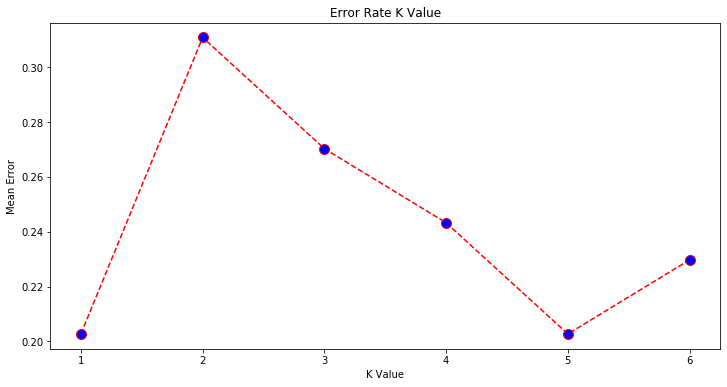

In [40]:
import matplotlib.pyplot as plt
import numpy as np
error = []

# Calculating error for K values between 1 and 8
for i in range(1, 7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(descriptiveTraining, targetTraining)
    pred_i = knn.predict(descriptiveTest)
    error.append(np.mean(pred_i != targetTest))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 7), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')